In [47]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [48]:
#Data
df_belarus = pd.read_csv("Dateien/Flug_Belarus.csv", sep=",")
df_belarus

,Timestamp,UTC,Callsign,Position,Altitude,Speed,Direction
0,1621754943,2021-05-23T07:29:03Z,RYR1TZ,"37.943665,23.962408",125,145,37
1,1621754953,2021-05-23T07:29:13Z,RYR1TZ,"37.949295,23.967785",325,161,37
2,1621754966,2021-05-23T07:29:26Z,RYR1TZ,"37.956924,23.975273",900,156,37
3,1621754978,2021-05-23T07:29:38Z,RYR1TZ,"37.964096,23.982319",1425,156,37
4,1621754988,2021-05-23T07:29:48Z,RYR1TZ,"37.96994,23.987888",1775,160,37
...,...,...,...,...,...,...,...
517,1621765273,2021-05-23T10:21:13Z,RYR1TZ,"53.887104,28.027693",0,24,317
518,1621765279,2021-05-23T10:21:19Z,RYR1TZ,"53.88763,28.026928",0,25,317
519,1621765291,2021-05-23T10:21:31Z,RYR1TZ,"53.888683,28.025356",0,25,317
520,1621765302,2021-05-23T10:21:42Z,RYR1TZ,"53.889221,28.024548",0,6,317


In [49]:
#Anpassung der Zeit auf UTC Standard
from datetime import datetime

l_date =[]
for i in range(len(df_belarus)):
    date_time_str = df_belarus["UTC"].iloc[i]
    l_date.append(datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%SZ'))

df_belarus["UTC"]=l_date
df_belarus

,Timestamp,UTC,Callsign,Position,Altitude,Speed,Direction
0,1621754943,2021-05-23 07:29:03,RYR1TZ,"37.943665,23.962408",125,145,37
1,1621754953,2021-05-23 07:29:13,RYR1TZ,"37.949295,23.967785",325,161,37
2,1621754966,2021-05-23 07:29:26,RYR1TZ,"37.956924,23.975273",900,156,37
3,1621754978,2021-05-23 07:29:38,RYR1TZ,"37.964096,23.982319",1425,156,37
4,1621754988,2021-05-23 07:29:48,RYR1TZ,"37.96994,23.987888",1775,160,37
...,...,...,...,...,...,...,...
517,1621765273,2021-05-23 10:21:13,RYR1TZ,"53.887104,28.027693",0,24,317
518,1621765279,2021-05-23 10:21:19,RYR1TZ,"53.88763,28.026928",0,25,317
519,1621765291,2021-05-23 10:21:31,RYR1TZ,"53.888683,28.025356",0,25,317
520,1621765302,2021-05-23 10:21:42,RYR1TZ,"53.889221,28.024548",0,6,317


array([[<AxesSubplot:title={'center':'Timestamp'}>,
        <AxesSubplot:title={'center':'UTC'}>],
       [<AxesSubplot:title={'center':'Altitude'}>,
        <AxesSubplot:title={'center':'Speed'}>],
       [<AxesSubplot:title={'center':'Direction'}>, <AxesSubplot:>]],
      dtype=object)

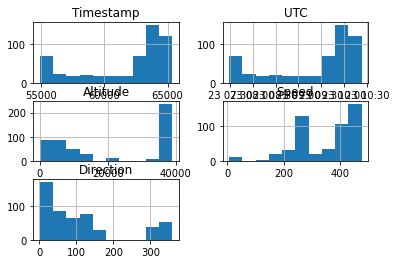

In [50]:
df_belarus.hist()

<AxesSubplot:>

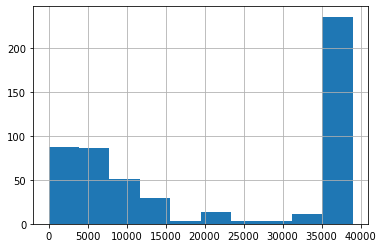

In [51]:
df_belarus["Altitude"].hist()

<AxesSubplot:>

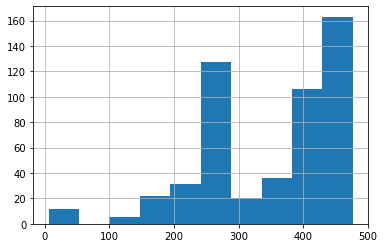

In [52]:
df_belarus["Speed"].hist()

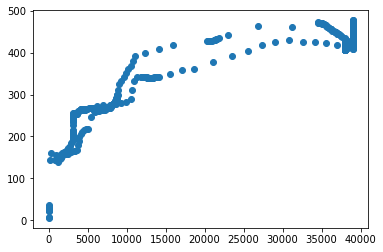

In [53]:
#Zusammenhang zwischen Höhe und Geschwindigkeit Linechart
plt.scatter(df_belarus["Altitude"], df_belarus["Speed"])

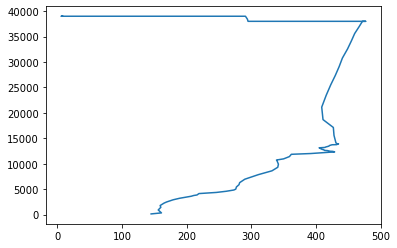

In [59]:
df_2 = pd.DataFrame(df_belarus["Speed"].unique(), columns=["Speed"])
df_2 = df_2.join(df_belarus["Altitude"])
plt.plot(df_2["Speed"], df_2["Altitude"])

In [55]:
#Distanz berechnende Funktion
def distance(s_lat, s_lng, e_lat, e_lng): #Source: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

   # approximate radius of earth in km
   R = 6373.0

   s_lat = s_lat*np.pi/180.0
   s_lng = np.deg2rad(s_lng)
   e_lat = np.deg2rad(e_lat)
   e_lng = np.deg2rad(e_lng)

   d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2

   return 2 * R * np.arcsin(np.sqrt(d))

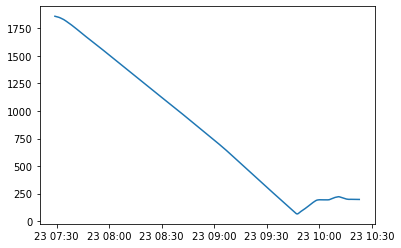

In [56]:
xyPos = []

#Erstelle Liste der Entfernungen zu jedem Zeitpunkt
iteration = 0
for i in df_belarus["Position"]:
    split = df_belarus["Position"].get(iteration).split(',')
    xyPos.append(distance(float(split[0]), float(split[1]), float(54.641434), float(25.28158)))

    iteration += 1

plt.plot(df_belarus["UTC"], xyPos)